In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


In [2]:
df = pd.read_csv("FAOLEX.csv")

shape = df.shape
# Get an overview of columns in the dataset

print(f"The shape of the dataframe is {shape}")
print("The data contains the following columns:")
for col in df.columns:
    print(col)


The shape of the dataframe is (194088, 18)
The data contains the following columns:
Record Id
Record URL
Document URL
Title
Original title
Date of original text
Last amended date
Available website
Language of document
Country/Territory
Regional organizations
Territorial subdivision
Type of text
Repealed
Abstract
Primary subjects
Domain
Keywords


In [20]:
## Inspect the dataset
df.tail()
# df.head()

,Record Id,Record URL,Document URL,Title,Original title,Date of original text,Last amended date,Available website,Language of document,Country/Territory,Regional organizations,Territorial subdivision,Type of text,Repealed,Abstract,Primary subjects,Domain,Keywords
194083,LEX-FAOC213920,http://www.fao.org/faolex/results/details/en/c...,http://faolex.fao.org/docs/pdf/arg213920.pdf,Decisión Administrativa 1013/2022 – Reglamento...,NaN,05-10-2022,NaN,www.infoleg.gov.ar,Spanish,Argentina,NaN,NaN,Regulation,NaN,En el marco de la normativa sobre adaptación y...,Climate change,Air & atmosphere; Environment,climate change; ozone layer; institution; gove...
194084,LEX-FAOC192515,http://www.fao.org/faolex/results/details/en/c...,http://faolex.fao.org/docs/pdf/arg192515.pdf,Ley Nº 27520 – Ley de presupuestos mínimos de ...,NaN,19-12-2019,NaN,www.infoleg.gov.ar,Spanish,Argentina,NaN,NaN,Legislation,NaN,La presente ley establece los presupuestos mín...,Environment; Climate change,Agriculture; Air & atmosphere; Land & soil; Se...,food sovereignty; desertification; water resou...
194085,LEX-FAOC213858,http://www.fao.org/faolex/results/details/en/c...,http://faolex.fao.org/docs/pdf/ecu213858.pdf,Decreto Ejecutivo 757 - Reglamento a la estruc...,NaN,06-05-2011,07-12-2017,Gob.ec,Spanish,Ecuador,NaN,NaN,Regulation,NaN,El presente Reglamento tiene por objeto fortal...,National development; Trade; Private sector & ...,Agriculture; Environment; General,business/industry/corporations; indigenous peo...
194086,LEX-FAOC213919,http://www.fao.org/faolex/results/details/en/c...,http://faolex.fao.org/docs/pdf/ivc213919.pdf,Implementation plan for the joint framework of...,NaN,2018,NaN,https://www.idhsustainabletrade.com,English,Côte d'Ivoire,NaN,NaN,Policy,NaN,This detailed action plan aims to implement th...,Agricultural & rural development; Forestry,Agriculture; Forestry; Cultivated plants,agricultural development; agro-forestry; capac...
194087,LEX-FAOC213923,http://www.fao.org/faolex/results/details/en/c...,http://faolex.fao.org/docs/pdf/por213923.pdf,Decree-Law No. 84/2022 establishing targets fo...,Decreto-Lei n.º 84/2022 de 9 de dezembro: Esta...,09-12-2022,NaN,https://dre.pt,Portuguese,Portugal,NaN,NaN,Legislation,NaN,This Decree-Law establishes targets for the co...,Energy,Energy,renewable energy; energy conservation/energy p...


# Potential ideas for data visualization 
- Plot over number of documents written in each given language
- Number of distinct countries and/or languages 
- Bar plot over different types of text
- Number of different categories in the attribute *__Primary subjects__* and potentially a plot


In [3]:
# Types of data
df.info()
# In many cases, the Dtype 'object' means that the values are strings. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194088 entries, 0 to 194087
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Record Id                194088 non-null  object
 1   Record URL               194088 non-null  object
 2   Document URL             194075 non-null  object
 3   Title                    194088 non-null  object
 4   Original title           62035 non-null   object
 5   Date of original text    194041 non-null  object
 6   Last amended date        28691 non-null   object
 7   Available website        147351 non-null  object
 8   Language of document     194001 non-null  object
 9   Country/Territory        193247 non-null  object
 10  Regional organizations   1061 non-null    object
 11  Territorial subdivision  32017 non-null   object
 12  Type of text             194088 non-null  object
 13  Repealed                 22930 non-null   object
 14  Abstract            

In [4]:
df.describe(include=object)

,Record Id,Record URL,Document URL,Title,Original title,Date of original text,Last amended date,Available website,Language of document,Country/Territory,Regional organizations,Territorial subdivision,Type of text,Repealed,Abstract,Primary subjects,Domain,Keywords
count,194088,194088,194075,194088,62035,194041,28691,147351,194001,193247,1061,32017,194088,22930,193887,194087,194083,194083
unique,194082,194081,194070,189741,58504,20482,6646,8883,304,2012,47,755,11,1,192065,742,2767,139662
top,LEX-FAOC201908,http://www.fao.org/faolex/results/details/en/c...,http://faolex.fao.org/docs/pdf/mlt201908.pdf,Ordinance amending the Plant Protection Ordina...,Änderung der Pflanzenschutzverordnung.,0000,2006,www.opsi.gov.uk,English,Russian Federation,CTMFM,Scotland,Regulation,Y,The Governor decrees that Regional Forest plan...,Food & nutrition,Food & nutrition,institution
freq,2,2,2,29,26,1032,557,5431,53564,8814,171,1285,129972,22930,24,22012,19054,724


In [24]:
# df["Type of text"].value_counts()
# df["Language of document"].value_counts()
# df["Regional organizations"].value_counts()
# df["Repealed"].value_counts()
df["Primary subjects"].value_counts() 
# df["Territorial subdivision"].value_counts()

Food & nutrition                                                                   22012
Environment                                                                        21261
Fisheries                                                                          20328
Livestock                                                                          16601
Cultivated plants                                                                  15988
                                                                                   ...  
Environment; Water; National development                                               1
Agricultural & rural development; Food & nutrition; Forestry; Cultivated plants        1
Food & nutrition; Cultivated plants; Water                                             1
Energy; Food & nutrition; Water                                                        1
Food & nutrition; Climate change; Disaster risk management                             1
Name: Primary subject

In [6]:
# Create simplified version of the dataframe by discarding irrelevant columns 
to_drop = ['Record Id', 
           'Record URL', 
           'Document URL', 
           'Title',
           'Original title',
           'Available website',
           'Abstract']

fao = df.drop(to_drop, inplace=False, axis=1)

In [99]:
# Create .csv file of all languages present in the dataset
languages = fao["Language of document"].value_counts()
languages.to_csv("languages_fao.csv", index=True)

In [7]:
# Replace NaN in "Repealed"
fao["Repealed"].fillna(value = "N", inplace=True)

# Convert relevant attributes to categorical data: 
fao["Type of text"] = pd.Categorical(fao["Type of text"])
fao["Repealed"] = pd.Categorical(fao["Repealed"])


In [9]:
fao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194088 entries, 0 to 194087
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Date of original text    194041 non-null  object  
 1   Last amended date        28691 non-null   object  
 2   Language of document     194001 non-null  object  
 3   Country/Territory        193247 non-null  object  
 4   Regional organizations   1061 non-null    object  
 5   Territorial subdivision  32017 non-null   object  
 6   Type of text             194088 non-null  category
 7   Repealed                 194088 non-null  category
 8   Primary subjects         194087 non-null  object  
 9   Domain                   194083 non-null  object  
 10  Keywords                 194083 non-null  object  
dtypes: category(2), object(9)
memory usage: 13.7+ MB


In [19]:
# Removing NaN in Countries attribute:
fao2 = fao.dropna(subset=["Country/Territory", "Keywords", "Primary subjects"])
print(fao.shape)
print(fao2.shape)
fao2.info()

(194088, 11)
(193242, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 193242 entries, 0 to 194087
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Date of original text    193195 non-null  object  
 1   Last amended date        28685 non-null   object  
 2   Language of document     193155 non-null  object  
 3   Country/Territory        193242 non-null  object  
 4   Regional organizations   220 non-null     object  
 5   Territorial subdivision  32017 non-null   object  
 6   Type of text             193242 non-null  category
 7   Repealed                 193242 non-null  category
 8   Primary subjects         193242 non-null  object  
 9   Domain                   193237 non-null  object  
 10  Keywords                 193242 non-null  object  
dtypes: category(2), object(9)
memory usage: 15.1+ MB


In [20]:
194088-193242

846

# Data visualization (drafts)
The following cells contain drafts / ideas for relevant data analysis. 

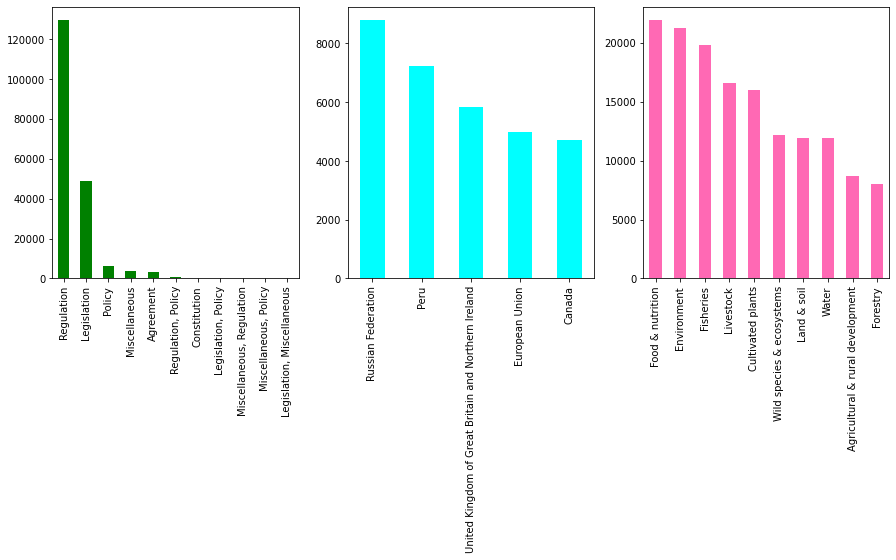

In [42]:
#plt.subplot(1, 2, 1)
#fao["Type of text"].value_counts().plot(kind="bar")
#fao["Country/Territory"].value_counts().head(15).plot(kind="bar")
#plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15,5))
fao2["Type of text"].value_counts().plot(kind="bar", ax=ax1, color="green")
fao2["Country/Territory"].value_counts().head().plot(kind="bar", ax=ax2, color="cyan")
fao2["Primary subjects"].value_counts().head(10).plot(kind="bar", ax=ax3, color="hotpink")
plt.show()

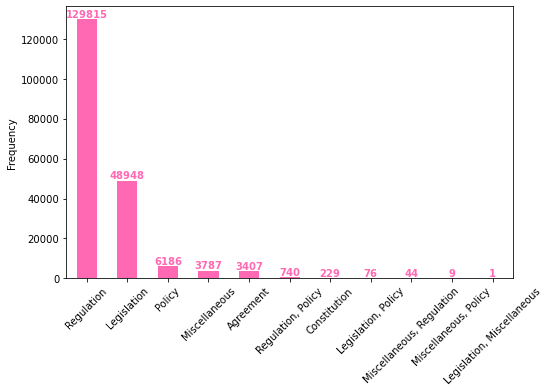

In [74]:
fig, ax1 = plt.subplots(1,1, figsize=(8,5))
fao2["Type of text"].value_counts().plot(kind="bar", ax=ax1, color="hotpink")
plt.xticks(rotation=45, horizontalalignment="center")
plt.ylabel("Frequency")
ax1.bar_label(ax1.containers[0], color="hotpink", weight="bold")
plt.show()

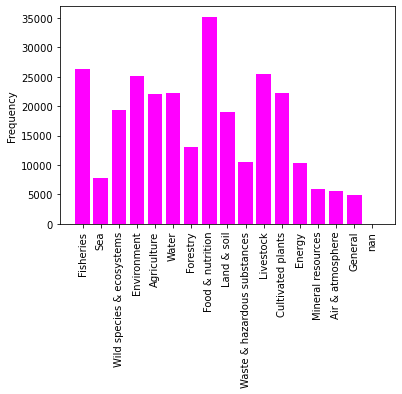

In [116]:
### TEST second plot over domain occurences ###
domain_occu = {}
for obs in fao2["Domain"]: 
    obs = str(obs)
    present = obs.split("; ")
    for word in present: 
        if word in domain_occu: 
            domain_occu[word] += 1
        
        if word not in domain_occu:
            domain_occu[word] = 1



domains, counts = zip(*domain_occu.items())
domains, counts = list(domains), list(counts)

plt.bar(domains, counts, color="magenta")
plt.ylabel("Frequency")
plt.xticks(rotation=90, horizontalalignment="center")
plt.show()

# World cloud visualization 

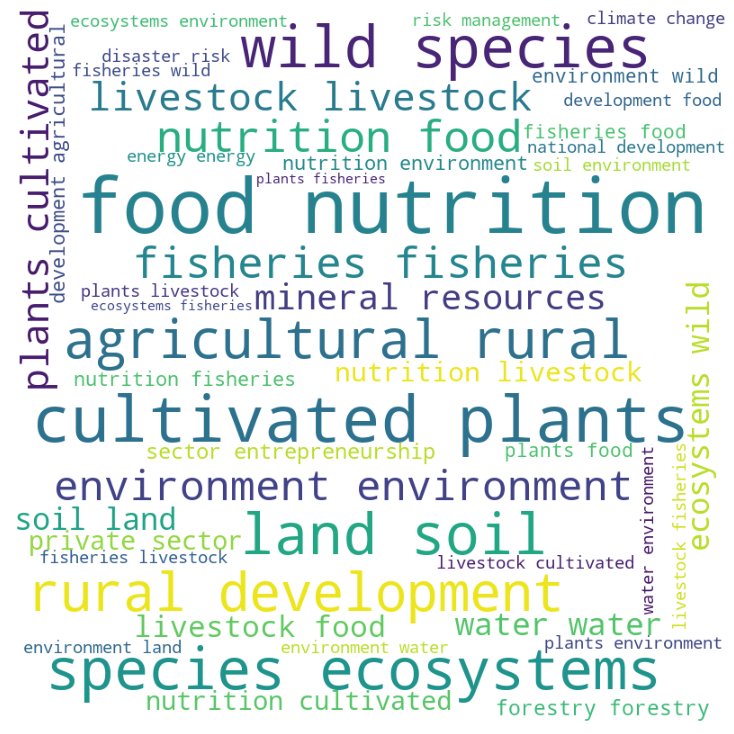

In [128]:
# World cloud (just for fun)
comment_words = ''
stopwords = set(STOPWORDS)

for val in fao2["Primary subjects"]:
    val = str(val)
    tokens = val.split("; ")
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)

plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()